<span style="color:red">Assignment Grade: 8.3</span>

  Q 1: 8.0

  Q 2: 9.0

  Q 3: 8.0

  Assignment grade is average of question grades. 

  Comments from pre-grade: We have found your assignment thanks. Sat. Apr 07 at 10:01:42  

  Q1 comments: Well done except that the PLD calculation is incorrect. You find the difference between the max values, but it should be the maximum of the difference at each time step. Hence, part b) is incorrect. Part c) required the value of the asymtote to be stated, but you did indicate it on your plot. 

  Q2 comments: Your slider controls the size of the time step but the question says it should control the number of time steps (-0.5). Your slider doesn't permit a time step small enough to smooth out the graph and reliably indicate convergence. No work shown to determine the limiting multiples of $2\pi$, such as `round(theta1[-1] / (2*np.pi))` (-0.5).

  Q3 comments: Your steps are correct however your data is offset. Look at the gaussian fit, there are two peaks when really there should be one in the histogram data. I think your data is just shifted a bit. This would explain why your later curves are incorrect. The method is correct mostly though!


# Homework Assignment 4

#### Due: Friday April 6th, 11:59pm.

Save your file in **mp248/Assignment.4/Assignment.4.ipynb** on your Bitbucket repository.


#### Problem 1:

For this problem, we ask you to consider the single pendulum and double pendulums with friction, from *Dynamic.plots.1.ipynb* and *Dynamic.plots.2.ipynb*.   

(a) In *Dynamic.plots.1.ipynb* the single pendulum differential equation had the two system constants, $a \geq 0$ is what we called the *friction constant*, and $b > 0$ is the *mass/gravity constant*.  The differential equation had the form $\theta'' + a \theta' + b \sin \theta = 0$.   The *total energy* of the system is

$$E_{tot} = (\theta')^2 + 2b -2b\cos\theta$$

For the simulation to be accurate, the total energy of the system should dissipate according to the heat loss through friction. Thus we should have equality

$$\frac{dE}{dt} = -2a(\theta')^2$$

We call the right hand side of this equation the *theoretical power loss of the system*. If $E(t_i)$ represents the actual total energy of the system at time $t_i$, then the *actual power loss between frames* $t_i$ and $t_{i+1}$ would be the quantity $\frac{E(t_{i+1})-E(t_i)}{t_{i+1} - t_i} = \frac{\Delta E}{\Delta t}$. 

For the system with $a=0.1$, $b=1$, $\theta_0 = 0$ and $\theta'_0=10$, create a plot with one slider controlling the time step.  In your plot, show $\theta(t)$ as a function of time. In a text field (in the plot) present the maximum (absolute value) of the difference between the theoretical $-2a(\theta')^2$ power and the actual power loss $\frac{\Delta E}{\Delta t}$ between frames of the animation.  Call this quantity the power-loss-deviation (PLD) of the simulation, i.e. in your plot you should have a text field "MAX PLD: number". 

Ensure your time interval is long enough so that one can see the pendulum coming to rest (let's define this to be $E_{tot}(t_i) < 0.1$) for $t_i$ at the end of your interval.  

(b) Determine the how small $\Delta t$ needs to be to ensure the maximum PLD is less than *1.0*.

(c) A properly simulated solution to this differential equation has a horizontal asymptote an integer multiple of $2\pi$.  How small does $\Delta t$ need to be to discover the correct asymptote, and what is the asymptote?


In [1]:
%matplotlib nbagg
from sympy.utilities.autowrap import ufuncify
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import matplotlib.animation as animation
from matplotlib.widgets import Slider
from scipy.integrate import odeint

###  Part 1A

In [2]:
#1a
#initial conditions:
tmax =65
a, b = 0.1, 1
y0 = [0,10]
dt = 1
t = np.arange(0, tmax, dt)
k= 0
y=y0

In [3]:
#1a

#solves the single pendulum ode for a given initial state and time array
#input: y = [theta, theta prime], t = time array, b,c = initial conditions
#output: dydt, an array containin
def pend(y, t,b, c): 
    th, tp = y
    dydt = [tp, -b*tp-c*np.sin(th)]
    return dydt

In [4]:


def mpld(sols):
    max_thr =max([-2*a*(sols[i,1])**2 for i in range(0,len(sols)-1)])
    Ecurr = np.array([(sols[i+1,1])**2+2*b - 2*b*np.cos(sols[i+1,0]) for i in range(1,len(sols)-1)])
    Eprev = np.array([(sols[i,1])**2+2*b - 2*b*np.cos(sols[i,0]) for i in range(0,len(sols)-2)])
    max_exp = max((Ecurr - Eprev)/dt)
    return abs(max_thr-max_exp)
    

<IPython.core.display.Javascript object>


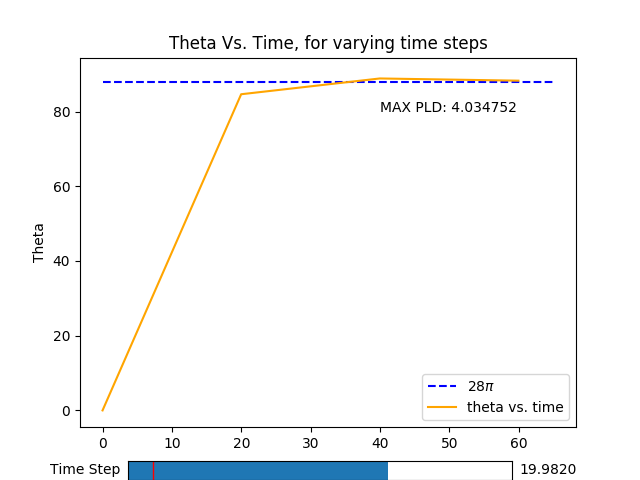

0

In [5]:
#1a

plt.close()
fig,ax = plt.subplots() 

sols = odeint(pend,y0,t,args=(a,b)) #initial plot solutions
#print(sols)

ax.plot([0,tmax], [28*np.pi,28*np.pi], 'b--', label = '28$\pi$' ) #asymptote of theta vs time
l, = plt.plot(t, sols[:,0], 'orange', label='theta vs. time')
max_pld = plt.text(40,80, 'MAX_PLD: %0.6f '%mpld(sols))
#plt.text(40,60,(sols[-1,1])**2+2*b -2*b*(np.cos(sols[-1,0]))**2) #energy at the end of the interval
plt.title('Theta Vs. Time, for varying time steps')
plt.ylabel('Theta')
ax.legend()

box = plt.axes([0.2, 0.0, 0.6, 0.04])
tstep = Slider(box, 'Time Step', -1, 30.0, valinit=dt, valfmt='%0.4f')

def update(val):
    dt = tstep.val
    t = np.arange(0,tmax,dt)
    sols = odeint(pend,y,t,args=(a,b))
    l.set_xdata(t)
    l.set_ydata(sols[:,0])
    fig.canvas.draw_idle()
    max_pld.set_text("MAX PLD: %6.6f" % mpld(sols)) #chaniging dynamic text field
    


tstep.on_changed(update) ## when the slider changes, what to do.



### Part 1B

In the plot, to have maximum PLD of 1, we need $\Delta t$ to be 10.7679

### Part 1C

The asymptotal behaviour first appears in the plot when $\Delta t = 20.7646$

### Part 1 - Extra Work

I originally misunderstood the purpose of the assignment and implemented instead a point that traces out theta over time, where the slider controls the time. This took me considerably longer than the actual task so I thought I'd include it here anyways.

<IPython.core.display.Javascript object>


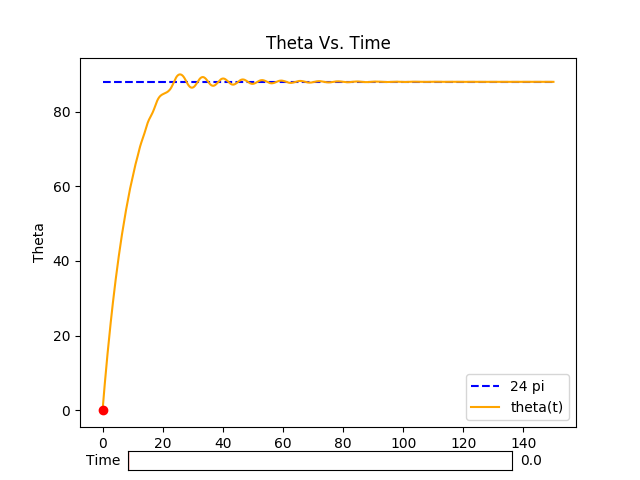

0

In [6]:
plt.close()
tmax =150
n=1000
a, b = 0.1, 1
y0 = [0,10]
dt = tmax/n
t = np.linspace(0, tmax, n)
k= 0
y=y0


sols = odeint(pend,y0,t,args=(a,b)) #initial plot solutions

fig, ax = plt.subplots()
asymp = 2*14*pi*np.ones(n)

ax.plot(t, asymp, 'b--', label = '24 pi')
ax.plot(t, sols[:, 0], 'orange', label = 'theta(t)')
plt.title('Theta Vs. Time')
plt.ylabel('Theta')
ax.legend()


ax.legend()


pt, = ax.plot(0, 0, 'ro')


T1 = 0 
TH1 = [0,10]
  
def update(t):
    global T1, T1_0
    global TH1, TH1_0
    
    if t == 0: #the kernel crashes when I set t to zero, so we let it approach zero instead 
        pt.set_xdata(0.00000001)
        pt.set_ydata(0.00000001)
        T1 = 0.00000001
        TH1 =[ 0.00000001,10]
        
    elif t == 150:
        pt.set_xdata(150)
        pt.set_ydata(sols[-1][0])
        
    else:
        inst_sols = odeint(pend, TH1, [T1, t], args = (a,b))
        T1 = t
        TH1 = inst_sols[1]
    
        pt.set_xdata(t)
        pt.set_ydata(TH1[0])

    
time = plt.axes([0.2, 0.02, 0.6, 0.04])
time_slide = Slider(time, 'Time', 0, tmax, valinit =0, valfmt= '%0.1f')
time_slide.on_changed(update)


    
    

#### Problem 2: 

We roughly repeat Problem 1, but for the double pendulum.  For this problem we ask you to extend the code from *Dynamic.plots.2.ipynb*.

(a) Make a plot of $\theta_1$ and $\theta_2$ vs. $t$ for the double pendulum with initial conditions 
$$ \theta_1(0) = \pi \hskip 1cm \theta_2(0) = 0$$
$$ \theta_1'(0) = 0 \hskip 1cm \theta_2'(0) = 10$$
$$m_1 = 1 \hskip 1cm m_2 = 1$$
$$r_1 = 1 \hskip 1cm r_2 = 1$$
$$k_1 \ 0.1 \hskip 1cm k_2 = 0.1$$
$$ g = 10$$

Have a slider that controls the number of steps in the numerical integration.   Have your plot run long-enough so that the asymptotic behaviour of $\theta_1$ and $\theta_2$ is apparent, in particular both trend towards integer multiples of $2 \pi$.

(b) How small does $\Delta t$ need to be to see this asymptotic behaviour reliably, and what are the integer multiples for $\theta_1$ and $\theta_2$ respectively? 


### Part 2A

In [7]:
#2a

#setting up sp symbols we need
w1, w2, t1, t2 = sp.symbols("w_1 w_2 t_1 t_2")
m1, m2, k1, k2, r1, r2, g, t = sp.symbols("m_1 m_2 k_1 k_2 r_1 r_2 g t")

In [8]:

#2a

# copied from Dynamic plots 3
xT1pp = (r1*(g*m2*r2*sp.sin(t2) - k2*w1 + k2*w2 - m2*r1*r2*w1**2*sp.sin(t1 - t2))*sp.cos(t1 - t2) - r2*(g*m1*r1*sp.sin(t1) + g*m2*r1*sp.sin(t1) + k1*w1 + k2*w1 - k2*w2 + m2*r1*r2*w2**2*sp.sin(t1 - t2)))/(r1**2*r2*(m1 - m2*sp.cos(t1 - t2)**2 + m2))
xT2pp = (m2*r2*(g*m1*r1*sp.sin(t1) + g*m2*r1*sp.sin(t1) + k1*w1 + k2*w1 - k2*w2 + m2*r1*r2*w2**2*sp.sin(t1 - t2))*sp.cos(t1 - t2) - r1*(m1 + m2)*(g*m2*r2*sp.sin(t2) - k2*w1 + k2*w2 - m2*r1*r2*w1**2*sp.sin(t1 - t2)))/(m2*r1*r2**2*(m1 - m2*sp.cos(t1 - t2)**2 + m2))

In [9]:
#2a

#setting up ode solver
t1pp = ufuncify([r1,r2,m1,m2,k1,k2,t1,t2,w1,w2,g], xT1pp)
t2pp = ufuncify([r1,r2,m1,m2,k1,k2,t1,t2,w1,w2,g], xT2pp)

## TH = (theta1, theta2, theta1', theta2')

def theODE(TH, t, r1, r2, m1, m2, k1, k2, g):
    return [TH[2], TH[3], \
            t1pp(r1, r2, m1, m2, k1, k2, TH[0], TH[1], TH[2], TH[3], g), \
            t2pp(r1, r2, m1, m2, k1, k2, TH[0], TH[1], TH[2], TH[3], g)]

In [10]:
#2a

#initial conditions
TH2_0= [np.pi, 0, 0, 10]
m1, m2 = 1, 1
r1, r2 = 1, 1
k1, k2 = 0.1, 0.1
g = 10
tmax2 = 30


<IPython.core.display.Javascript object>


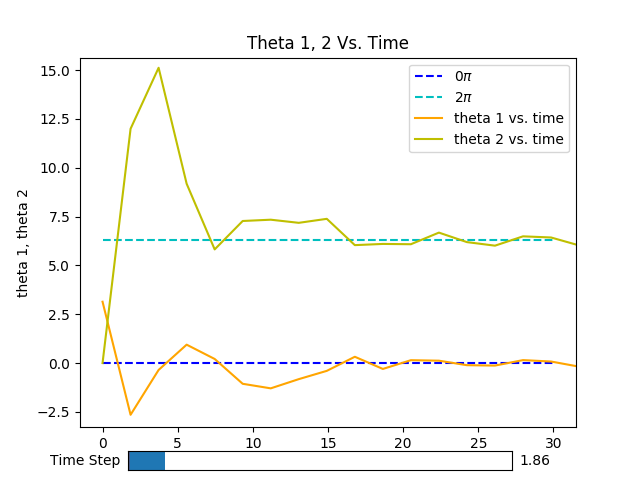

0

In [18]:
#2b

plt.close()
fig2,ax = plt.subplots() 

dt2 = 1
tarr = np.arange(0,tmax2,dt2)
sols2 = odeint(theODE, TH2_0, tarr, args = (r1,r2,m1,m2,k1,k2,g))

#initial plots
plt.plot([0,tmax2], [0,0], 'b--', label = '0$\pi$')
plt.plot([0,tmax2], [np.pi*2,np.pi*2], 'c--', label='2$\pi$')


theta1, = plt.plot(tarr, sols2[:,0], 'orange', label ='theta 1 vs. time')
theta2, = plt.plot(tarr, sols2[:,1], 'y',  label ='theta 2 vs. time')

plt.legend()
plt.ylabel("theta 1, theta 2")
plt.title("Theta 1, 2 Vs. Time")


def update(val):
    global sols2
    dt = val
    tarr = np.arange(0,tmax,dt)
    sols2= odeint(theODE, TH2_0, tarr, args = (r1,r2,m1,m2,k1,k2,g))
    
    theta1.set_ydata(sols2[:,0])
    theta1.set_xdata(tarr)
    theta2.set_ydata(sols2[:,1])
    theta2.set_xdata(tarr)
    
    fig.canvas.draw_idle()
    

time_step = plt.axes([0.2,0.02,0.6,0.04])
time_slide = Slider(time_step, 'Time Step', 1, 10, valinit=1)
time_slide.on_changed(update)
    


### Part 2B

The asymptotal behaviour of both $\theta_1$, $\theta_2$ with respect to time becomes apparent when $\Delta t = 2.21$ Both $\theta_1$, $\theta_2$ trend towards multiples of 2$\pi$: $0\pi$ and $2\pi$, respectively

### Part 2 - Extra Work

As in part one, I implemented the dot moving along the curve. In part 2A, computing the ODE in real time for small $\Delta t$ becomes too slow. This plot shows a nice smooth solution curve for the double pendulum, which is tedious to visualize in part 2A. This plot was much harder than that in part 1 - if you move the slider too quickly or too slowly, the dot may wildly deviate from its course. If you move the slider past a certain point and then return towards t=0, the dot will also dissappear near zero. I have it set so that when you return to t = 0, the dot reappears, and the plot resets.

In [12]:
#initial conditions
m1, m2 = 1, 1
r1, r2 = 1, 1
k1, k2 = 0.1, 0.1
TH2 = TH2_0
g = 10
tmax2 = 30
n2 = 150
tarr = linspace(0,tmax2, n2)
dt2 = tmax2/n2
sols_2 = odeint(theODE, TH2, tarr, args = (r1,r2,m1,m2,k1,k2,g) )
#print(sols_2[1])

<IPython.core.display.Javascript object>


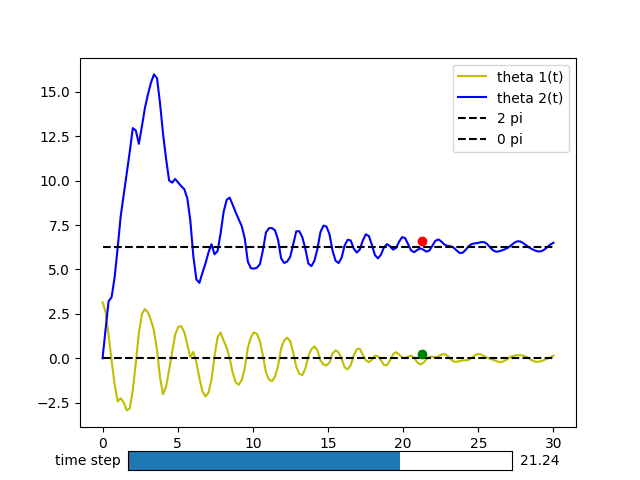

0

In [13]:
plt.close()
fig2, ax = plt.subplots()

#theta and time
T2= 0
TH2 = [np.pi,0,0,10]


#initial plot
ax.plot(tarr, sols_2[:, 0], 'y', label = 'theta 1(t)')
ax.plot(tarr, sols_2[:, 1], 'b', label = 'theta 2(t)')
ax.plot([0,tmax2], [2*np.pi, 2*np.pi], 'k--', label ='2 pi')
ax.plot([0,tmax2], [0,0], 'k--', label ='0 pi')

#plotting dots
pt2, = ax.plot(0, sols_2[0][0], 'go')
pt3, = ax.plot(0,sols_2[0][1] , 'ro')
ax.legend()

#makes the dots follow (not very well at this time) the functions
def update2(t):
    global T2
    global TH2, TH2_0
    
    if t == 0:
        pt2.set_xdata(0.0000001)
        pt2.set_ydata(np.pi)
        
        pt3.set_xdata(0.0000001)
        pt3.set_ydata(0.0000001)
       
        T2 = 0.0000001
        TH2  = [np.pi, 0.0000001, 0.0000001, 10]
        
    elif t == tmax2:
        pt2.set_xdata(tmax2)
        pt2.set_ydata(sols_2[-1][0])
        
        pt3.set_xdata(tmax2)
        pt3.set_ydata(sols_2[-1][1])
        
    else:
        inst_sols2 = odeint(theODE, TH2, [T2,t], args = (r1,r2,m1,m2,k1,k2,g))
    
        T2 = t
        TH2 = inst_sols2[-1]
    #print(inst_sols)

        pt2.set_xdata(t)
        pt2.set_ydata(TH2[0])
    
        pt3.set_xdata(t)
        pt3.set_ydata(TH2[1])
    

    

steps = plt.axes([0.2, 0.02, 0.6, 0.04])
time_step = Slider(steps, 'time step', 0.0, tmax2, valinit = 0.0)
time_step.on_changed(update2)



    
    

#### Problem 3: 

We want to analyze and model the wave data from Lab 3 in Part I in more detail. Read the data as you did in Lab 3. The data has now changed because we are at a different date. Recall that each row contains a number of quantaties for each hour of each day over the past three weeks. Here we are interested in the distrubution of wind speeds and if and how they correlate with wave heights.

**3.1**

Read the data and make a histogram of the wind speed using $n = 10$ bins. Print a formatted statement specifying the mean of the wind speed distribution.

In [14]:
import datetime as dt
from scipy.stats import norm
from scipy.stats import pearsonr


### Part 3.1

In [15]:

%%bash
wget http://www.ndbc.noaa.gov/data/realtime2/46206.txt?accesessType=DOWNLOAD -O wvdat.txt


--2018-04-07 06:10:31--  http://www.ndbc.noaa.gov/data/realtime2/46206.txt?accesessType=DOWNLOAD
Resolving www.ndbc.noaa.gov (www.ndbc.noaa.gov)... 140.90.238.27
Connecting to www.ndbc.noaa.gov (www.ndbc.noaa.gov)|140.90.238.27|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100486 (98K) [text/plain]
Saving to: 'wvdat.txt'

     0K .......... .......... .......... .......... .......... 50% 70.7K 1s
    50K .......... .......... .......... .......... ........  100%  336K=0.9s

2018-04-07 06:10:32 (115 KB/s) - 'wvdat.txt' saved [100486/100486]



In [16]:
#3.1
file = "wvdat.txt"
file = open(file, 'r')
file = file.readlines()
#print(file[1])

In [17]:
#3.1
WSPD = []
WVHT = []

for i in range (2,50):
    curr = file[i].split()

    WSPD.append(curr[6]) #creating lists
    WVHT.append(curr[8])
    


WSPD = [float(i) for i in WSPD] #converting strings to int
WVHT = [float(i) for i in WVHT]
#print(WSPD,WVHT)



The mean value of WSPD is 9 .


<IPython.core.display.Javascript object>


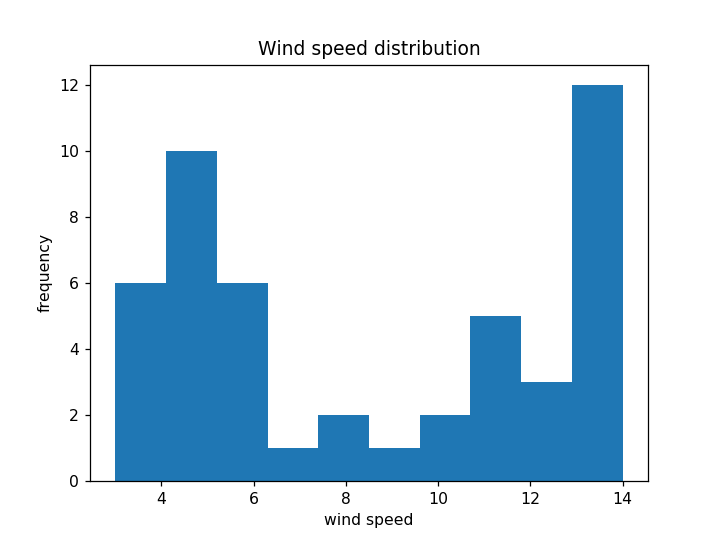

In [18]:
#3.1
plt.close()

mu = np.mean(WSPD)
print("The mean value of WSPD is %0.0f" %mu,'.')

n=10
ah=plt.hist(WSPD,n) #plotting histogram
plt.title('Wind speed distribution')
plt.xlabel('wind speed')
plt.ylabel('frequency')
#print(ah[1], ah[0])




### Part 3.2

Normalize the data so that the integral of the histogram is unity. Fit the normalized wind speed distribution with a the probability density function of a standard normal distribution. Plot the normalized data and the probability density function.

<IPython.core.display.Javascript object>


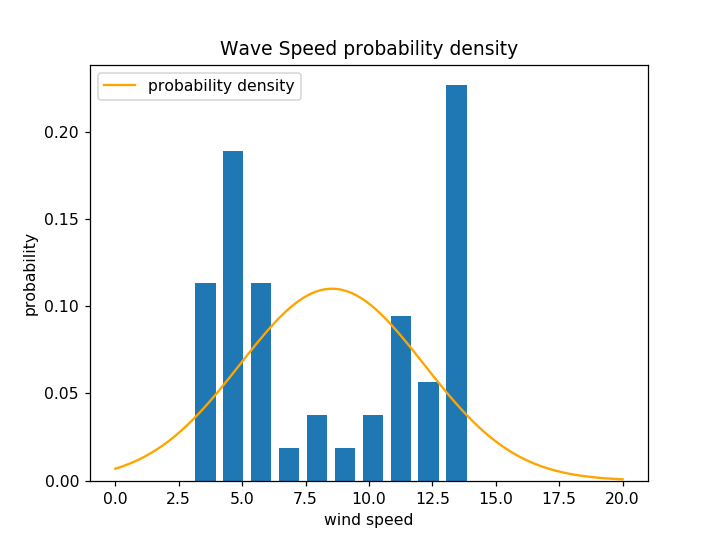

In [19]:
#3.2
plt.close()

y=ah[0]
x=ah[1][0:-1]+0.5*diff(ah[1])

y_norm = y/(len(WSPD)*(max(WSPD)-min(WSPD))/10) #dividing each area such that instead of wave speed frequency, we now have wave speed probability
#print(y_norm)
plt.bar(x,y_norm)
plt.title('Wave Speed probability density')
plt.xlabel('wind speed')
plt.ylabel('probability')

mu= np.mean(WSPD)
sig = np.var(WSPD)

#fits a standard normal curve to a given dataset with mean mu and variance sig.
def pdf_normal(x,mu,sig):
    thing = sqrt(2*pi*sig)
    thang = -(x-mu)**2/(2.*sig)
    return exp(thang)/thing


xx = np.linspace(0,20,100) #more points so the function is smooth
plt.plot(xx, pdf_normal(xx,mu,sig), 'orange', label='probability density')
plt.legend()


**3.3**

Plot the wave height vs. wind speed. Using your own Pearson's r coefficient function determine that coefficient for the data sets wind speed and waveheight. A simply model may predict that once the wind starts increasing it may take a while for the wave height to follow. Modify your plot of wave height vs. wind speed so that it can apply an `hour_offset` so that you plot the wave height at `t + hour_offset` vs. windspeed at time `t` (remember that in the data file the latest measurements are in the top row and following rows go backward in time). 

In [20]:
#3.3

#inputs two data sets and returns the corresponding Pearson's r coefficient
def get_r (x,y):
    mx = np.mean(x)
    my = np.mean(y)
    xdiff = x-mx
    ydiff = y-my
    return sum(xdiff*ydiff)/(sqrt(sum(xdiff**2))*sqrt(sum(ydiff**2)))

#returns new wavespeed array
def axes_hour_offset(hour_offset):
    newSP = []
    for i in range (2+hour_offset,50+hour_offset): #getting new dataset from file
        curr = file[i].split()

        newSP.append(curr[6])
        newSP = [float(i) for i in newSP]
    return newSP
        
    


Person's r coefficient for the unmodified data sets is: 0.438743


<IPython.core.display.Javascript object>


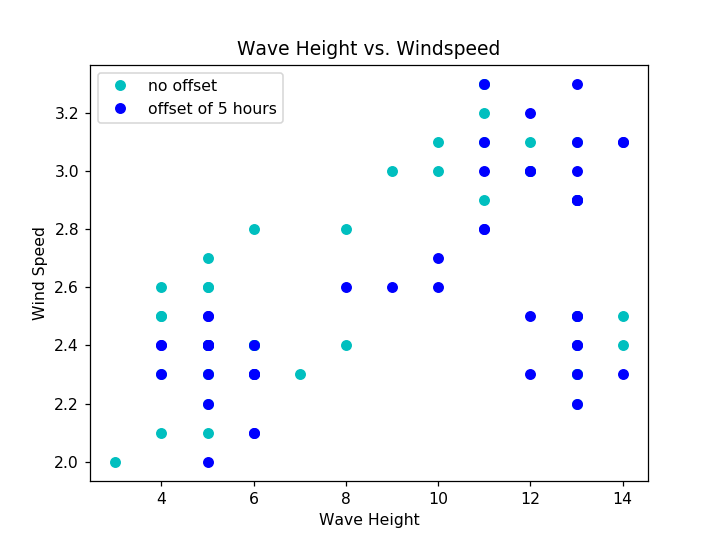

In [21]:
#3.3
print("Person's r coefficient for the unmodified data sets is: %0.6f" %get_r(np.array(WSPD), np.array(WVHT)))
#print(pearsonr(WSPD,WVHT))

plt.close()
plt.plot(WSPD, WVHT, 'co', label= 'no offset')


SPnew = axes_hour_offset(5)
plt.plot(SPnew, WVHT, 'bo', label = 'offset of 5 hours')
plt.title("Wave Height vs. Windspeed")
plt.xlabel('Wave Height')
plt.ylabel('Wind Speed')
plt.legend()



**3.4**

Determine Pearson's r coefficient for `hour_offset` in the range `[0,10]`. Plot Pearson's r coefficient against `hour_offset`. Overplot a least-square fit of a $4^{th}$ order polynomial. Print a formatted sentence that states the value of the `hour_offset` for the maximum correlation between wave height vs. wind speed. (Do not read off the maximum, but use a an expression that will alway print the right off set no matter what the data set is. Remember it changes every day!).

<IPython.core.display.Javascript object>


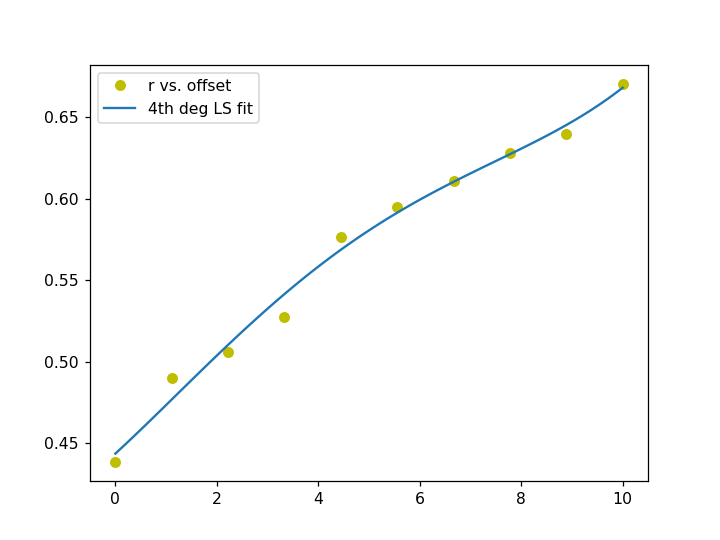

The hour offset with the greatest correlation is 10


In [22]:
#3.4
r_vals = []
#r_valsth = []


for i in range(0,10): #get r for each hour offset
    y = np.array(WVHT)
    x = axes_hour_offset(i)
    r_vals.append(get_r(x,y))
   # r_valsth.append(pearsonr(x,y))
    
plt.close()
xvals  = np.linspace(0,10,10)
plt.plot(xvals, r_vals, 'yo', label="r vs. offset")
#plt.plot(xvals, r_valsth, 'ko', label="r vs. offset")

z= np.polyfit(xvals, r_vals, 4) #fitting the polynomail
p = np.poly1d(z)
xvals = np.linspace(0,10,100)
plt.plot(xvals, p(xvals), '-', label ="4th deg LS fit")
plt.legend()


print("The hour offset with the greatest correlation is %d" %(r_vals.index(max(r_vals))+1 ))


